# Applied Time Series Analysis - Lab 1
Monica Alicea  
Last edited: 2021-03-02


## Introduction
The purpose of this lab is to investigate the methods and findings of the research paper, *Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle* (2019) by Holly Ching Yu Lam, Andy Haines, Glenn McGregor, Emily Ying Yang Chan, and Shakoor Hajat. Using the paper data, I am able to recreate their findings and further analyze the patterns and behaviors of El Niño as a time series. To discover these patterns and behaviors, I plot the realization, sample autocorrelation, and periodogram of the El Niño data. Using this information, I am able to identify the years and dominant frequencies of the El Niño oscillation cycle. To extend the reach of my investigation, I take the analysis methods from the Lam et al. (2019) paper and apply them to a new time series dataset to examine the periodic behavior and frequency of an event to determine if it has similar patterns to El Niño. 

## Summary of Discussion Paper
In the paper *Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle* (2019), authors Holly Ching Yu Lam, Andy Haines, Glenn McGregor, Emily Ying Yang Chan, and Shakoor Hajat explored whether the El Niño Southern Oscillation influenced rates of people affected by natural disasters (PAD). El Niño is a major cause of climate variability. Its effect on sea surface temperatures causes changes in temperature, precipitation patterns, and weather extremes in tropical regions around the world (Lam et al., 2019). Past studies have shown that El Niño has increased flood-related risks, the frequency of droughts, and overall PAD rate (Lam et al., 2019). Lam et al. (2019) studied the annual PAD rates at global, regional, and country levels between 1964-2017 to analyze the links between ENSO and natural disasters. 

Alongside the PAD data, the authors used two datasets representing ENSO indices: the Oceanic Niño Index (ONI)--a three-month moving average of anomalies in sea surface temperatures in the equatorial Pacific--and the multivariate El Niño Index (MEI)--a two-month index that tracks six relevant variables in the tropical Pacific. The PAD revealed that the majority of people were affected by floods, droughts, or storms, and over 75% of these natural disasters occurred in Asia (Lam et al., 2019). As such, the authors limited regional and country analysis to East Asia, South Asia, and Southeast Asia. and By comparing the PAD data to the ONI and MEI data, Lam et al. (2019) found that globally, there was a positive correlation between increasing strength of ENSO and increasing PAD. Regionally, Lam et al. (2019) discovered that an El Niño warm phase caused higher flood-related PAD rates, while a cool phase (often called La Niña) caused higher storm-related PAD rates. At a country level, the Philippines and India were found to be the most sensitive to El Niño-related climate variability, both countries experiencing higher PAD rates in years of the phenomenon. 

Overall, the authors were able to conclude that their results suggested an association between El Niño and PAD rates. Lam, Haines, McGregor, Chan, and Hajat hope that identifying the links between El Niño oscillation cycles and natural disasters will help inform natural disaster early warning systems and improve disaster preparedness strategies. 

## Methodology

The data needed to examine the Lam et al. (2019) results is the Oceanic Niño Index and multivariate El Niño Index, two of the strongest indicators for ENSO, as well as the Persons Affected by Disasters data and World Bank country popultation data, to determine the people affected by disasters per 1000:
1. The Oceanic Niño Index (ONI)
  *   https://psl.noaa.gov/data/correlation/oni.data
  *   https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt

2. Multi-variate ENSO Index (MEI)
  *   https://psl.noaa.gov/enso/mei/data/meiv2.data (1979-2021)
  *   https://psl.noaa.gov/enso/mei.old/table.html (1950-2018)

3. Persons Affected by Disasters (PAD) and World Bank Data
  *   https://public.emdat.be/
  *   https://data.worldbank.org/indicator/SP.POP.TOTL


To examine my own example of an El Niño like pattern, I use the Arctic Oscillation Index, which captures weather patterns that cause strong oscillations in the Arctic Pole:
4. Arctic Oscillation Index
  *   https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/ao_index.html

After downloading and cleaning these datasets, as well as combining the PAD and World Bank data, it is prepared for analysis.

 ### *Oceanic Ni&ntilde;o Index (ONI)*

In [35]:
# Define the URL, scrub the file name from the URL and download to /tmp
oni.url <- "https://www.cpc.ncep.noaa.gov/data/indices/oni.ascii.txt"
oni.name <- tail(unlist(strsplit(oni.url, "/")), n=1)
oni.file <- paste("/content/", oni.name, sep="")
download.file(oni.url, oni.file, method = 'auto')

In [36]:
# Read directly to dataframe preserving the header
oni.df <- read.table(oni.file, header = TRUE)
#oni.df

In [37]:
dec_feb <- subset(oni.df, SEAS == 'DJF' & YR > 1963 & YR < 2018, select=c(SEAS, YR, ANOM))

### *Multi-variate ENSO Index (MEI)*

In [7]:
# Define the URL, scrub the file name, and download it to /tmp
mei.url <- "https://psl.noaa.gov/enso/mei.old/table.html"
mei.name <- tail(unlist(strsplit(mei.url, "/")), n=1)
mei.file <- paste("/tmp/", mei.name, sep="")
download.file(mei.url, mei.file, method = 'auto')

In [8]:
# Read the column names from the data
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^YEAR.*", my.line)
  if (length(a) > 0) {
    my.cols <- unlist(strsplit(my.line, "\\s+"))
  }
}

In [ ]:
# Create an empty dataframe
n.cols <- length(my.cols)
mei.df <- data.frame(matrix(ncol = n.cols, nrow = 0))
colnames(mei.df) <- my.cols 
str(mei.df)

In [10]:
# Get all the data lines
a <- readLines(mei.file)
for (my.line in a){
  a <- grep("^[0-9].*", my.line)
  if (length(a) > 0) {
    my.data <- unlist(strsplit(my.line, "\\s+"))
    num.data <- length(my.data)
    if (num.data == n.cols) {
      my.values <- c()
      for (d in my.data) {
        my.values <- append(my.values, as.numeric(d))
      }
      mei.df[nrow(mei.df)+1,] = my.values
    }
  }
}

In [11]:
new_mei <- mei.df

In [ ]:
# Slice the dataframe for all rows and not the first column
mei.df[1:10, 2:n.cols]

In [ ]:
# Check that it works on the first ten rows
as.vector(t(mei.df[1:10, 2:n.cols]))

In [14]:
dec_jan <- subset(new_mei, YEAR > 1963 & YEAR < 2018, select=c(YEAR, DECJAN))

### *Persons Affected by Disasters (PAD)*

In [22]:
pad.file <- "/content/emdat_public.csv"
pad.df.all <- read.csv(pad.file, header=TRUE, skip=6)

In [23]:
cols.interest <- c("Country", "ISO", "Start.Year", "Start.Month", 
                   "End.Year", "End.Month", "Total.Affected")
pad.df <- pad.df.all[cols.interest]

#### Population totals for countries
The total populations for countries can be found through [The World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL).


In [24]:
wbank.url <- "http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=csv"
wbank.name <- "world_bank.zip"
wbank.file <- paste("/content/", wbank.name, sep="")
download.file(wbank.url, wbank.file)

In [25]:
unzip(zipfile = wbank.file, exdir = "/content")

In [ ]:
my.file <- ""
for (content.file in list.files("/content")){
  a <- grep("^API_SP.POP.TOTL.*csv", content.file)
  if (length(a) > 0) {
    my.file <- content.file
  }
}
print(my.file)

In [27]:
# Add the path back to the file name
wb.file <- paste("/content/", my.file, sep="")

In [28]:
wb.df <- read.csv(wb.file, header = TRUE, skip = 4)

#### Joining country populations to our disaster counts

In [29]:
# Loop through each row of our data frame and
# find the matching country and year
# remember that year columns in World Bank start with "X"
for (i in 1:nrow(pad.df)) {
  # Remember i is the row index in pad.df
  tmp.iso <- pad.df[i, ][['ISO']]
  tmp.year <- pad.df[i, ][['Start.Year']]
  tmp.col <- paste("X", tmp.year, sep="")
  # Match returns "NA" if no match
  a <- match(tmp.iso, wb.df$Country.Code)
  if (!is.na(a)) {
    tmp.pop <- wb.df[,tmp.col][a]
    # We can create new dataframe columns on the fly
    pad.df[i, 'POP'] = tmp.pop
    #print(c(tmp.iso, tmp.year, tmp.pop))
  } else {
    # Make sure to assign missing values, too!
    pad.df[i, 'POP'] = NA
    #print(paste("Could not match", tmp.iso))
  }
}

In [30]:
all_years <- c(1964:2017)
pad_per_1000 <- c()

for (year in all_years){
  # Calculate the total number of people impacted by disasters in year
  # Filter out any NA rows/cols
  my_pad <- subset(pad.df, Start.Year == year)
  pad_year <- 0
  for (i in 1:nrow(my_pad)){
    if (!is.na(my_pad$Total.Affected[i]) & !is.na(my_pad$POP[i])) {
      my.ta <- my_pad$Total.Affected[i]
      my.tp <- my_pad$POP[i]
      pad_year <- pad_year + my.ta
    }
  }

  # Find the total population of unique counties impacted by disasters for year
  pop <- 0
  for (my.iso in unique(my_pad$ISO)){
    #print(my.iso)
    a <- match(my.iso, my_pad$ISO)
    tmp.pop <- my_pad$POP[a]
    if (!is.na(tmp.pop)) {
      pop <- pop + tmp.pop
    }
  }

  # Calculate (per 1000) PAD for year
  pad_for_year <- pad_year/pop*1000
  pad_per_1000 <- append(pad_per_1000, pad_for_year)
}

new_pad <- data.frame (year  = all_years, pad_per_1000)

In [ ]:
new_pad

### *Arctic Oscillation Index*

In [32]:
# Define the URL, scrub the file name from the URL and download to /tmp
aoi.url <- "https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/monthly.ao.index.b50.current.ascii"
aoi.name <- tail(unlist(strsplit(aoi.url, "/")), n=1)
aoi.file <- paste("/content/", aoi.name, sep="")
download.file(aoi.url, aoi.file, method = 'auto')

In [ ]:
# Read directly to dataframe preserving the header
aoi.df <- read.table(aoi.file, header = FALSE, col.names = c("Year", "Month","AO.Index"))
#aoi.df

## Results

In [2]:
#This analysis requires the use of the "tswge" package
install.packages("tswge")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘signal’, ‘PolynomF’, ‘waveslim’, ‘astsa’




In [3]:
library("tswge")

### *Figure 1 Replication*

The first plot represents total people affected by disasters (PAD) per 1000 with x-axis "Year" and y-axis "PAD". The second plot represents anomalies in the Oceanic Niño Index from December through February, annually. The plot has an x-axis of "Year" that ranges from 1964-2017, and a y-axis of "ONI", representing the ONI anomalies. The third plot represents Multi-variate ENSO Index (MEI) values for the months December through January, annually. The plot has an x-axis of "Year" that ranges from 1964-2017, and a y-axis of "MEI".

Together, these three figures replicate Figure 1 from the Lam et al. (2019) paper. 

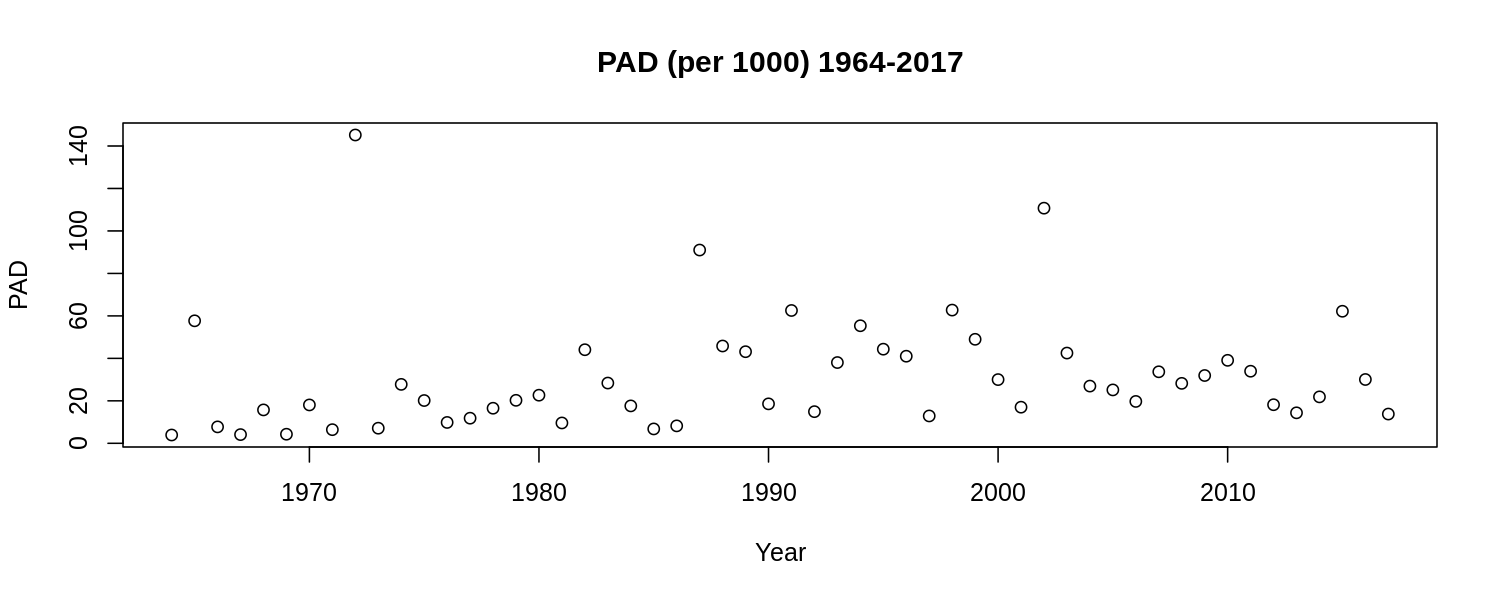

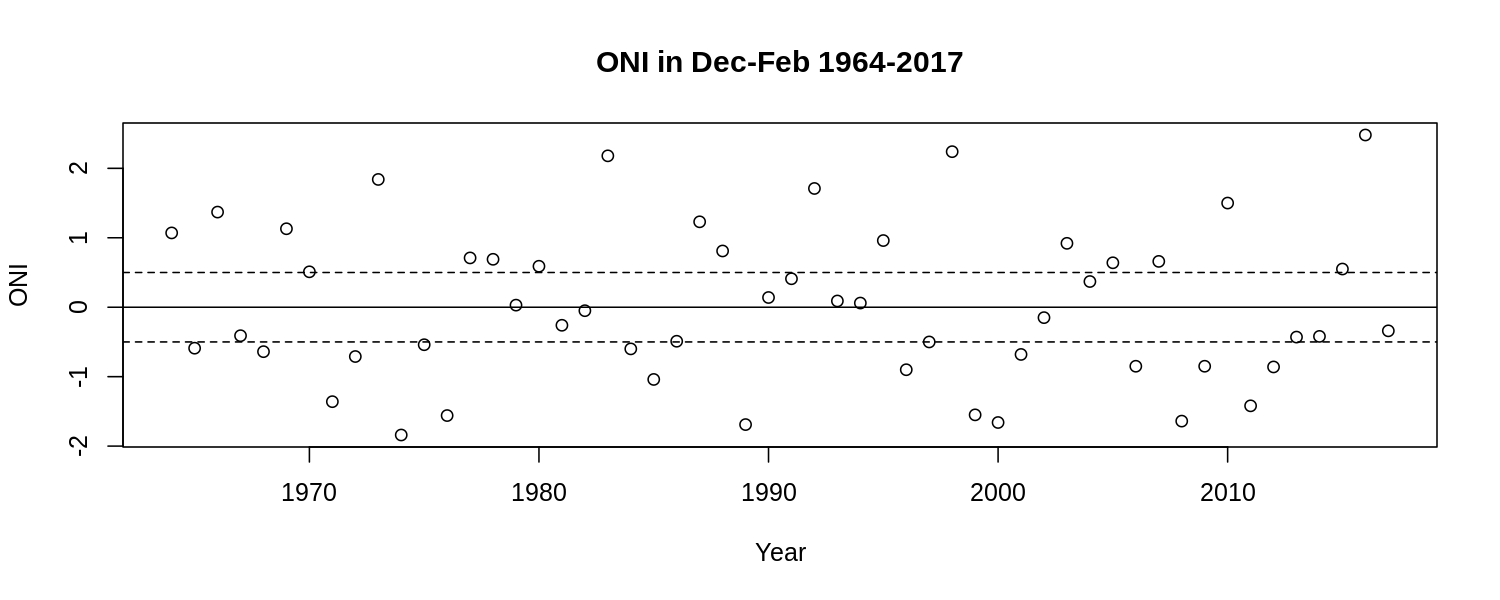

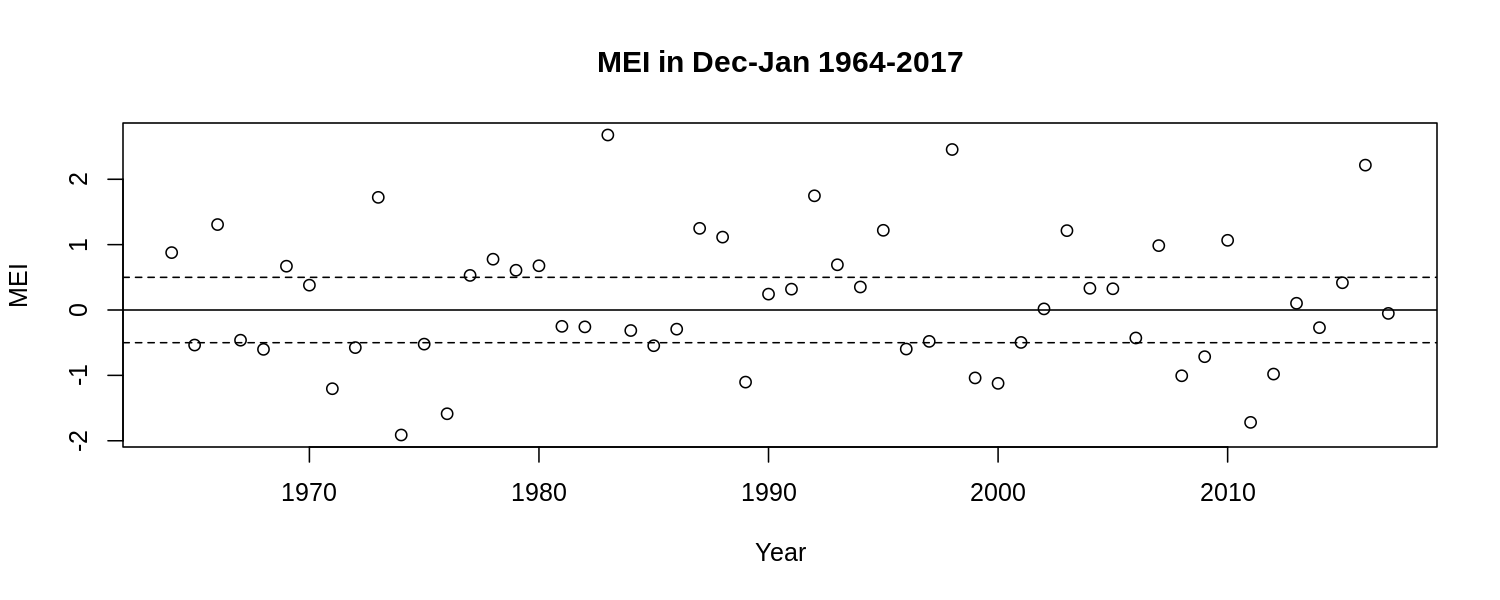

In [47]:
options(repr.plot.width = 10, repr.plot.height = 4, repr.plot.res = 150)

#PAD (per 1000) 1964-2017
plot(new_pad$year , new_pad$pad_per_1000, 
  main = "PAD (per 1000) 1964-2017", 
  xlab = "Year", 
  ylab = "PAD")

#ONI in Dec-Feb 1964-2017
plot(dec_feb$YR, dec_feb$ANOM, 
  main = "ONI in Dec-Feb 1964-2017", 
  xlab = "Year", 
  ylab = "ONI")
abline(h = 0)
abline(h = 0.5, lty = 'dashed')
abline(h = -0.5, lty = 'dashed')

#MEI in Dec-Jan in 1964-2017
plot(dec_jan$YEAR , dec_jan$DECJAN, 
  main = "MEI in Dec-Jan 1964-2017", 
  xlab = "Year", 
  ylab = "MEI")
abline(h = 0)
abline(h = 0.5, lty = 'dashed')
abline(h = -0.5, lty = 'dashed')

### *ONI*

Below are a time series realization, sample autocorrelation, and periodogram of the ONI data. I also employed the "parzen.wge" function to create a smoothed version of the periodogram called a parzen window. 

The periodogram and parzen window show a peak at frequency = 0.03. This frequency correlates to a period of p = 1/0.03 = 33.33. Since the time unit of the ONI dataset is months, this means that our time realization has a period of around 3 years. The time realization shows fairly smooth lines with peaks occurring an average of 3 times a decade. This translates to an average period of around 3 years, which is in line with the findings of our periodogram. 

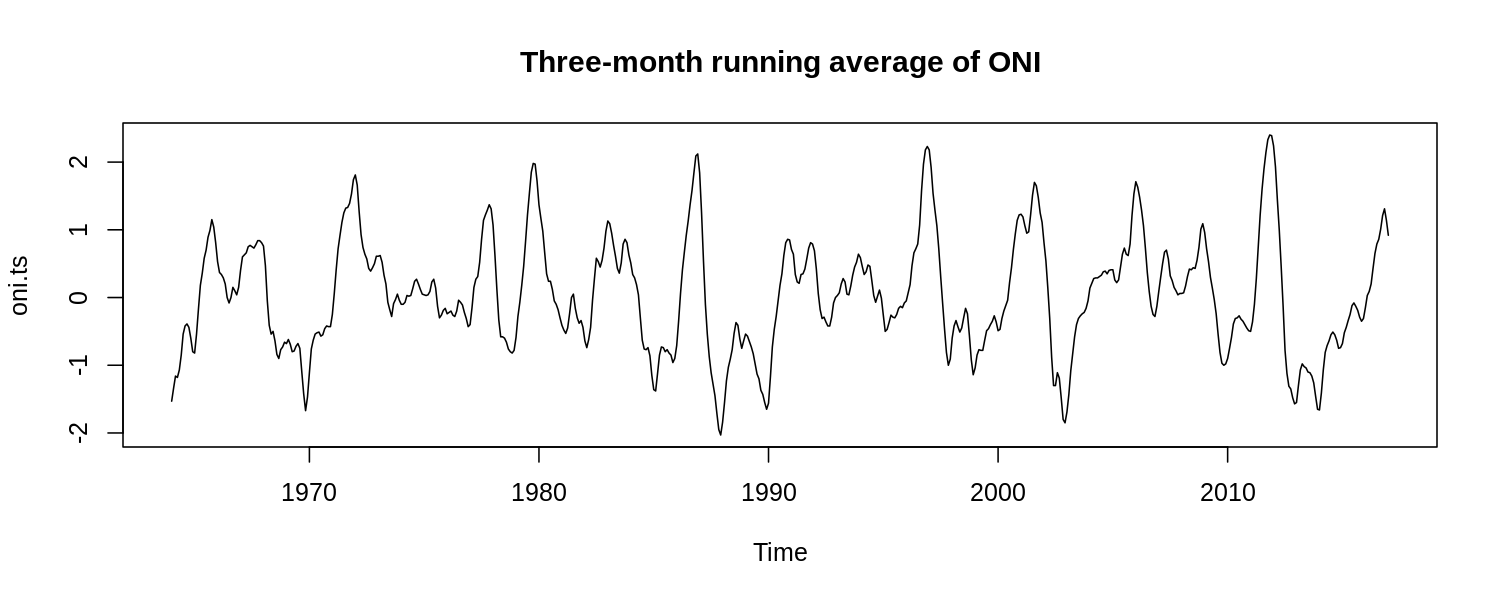

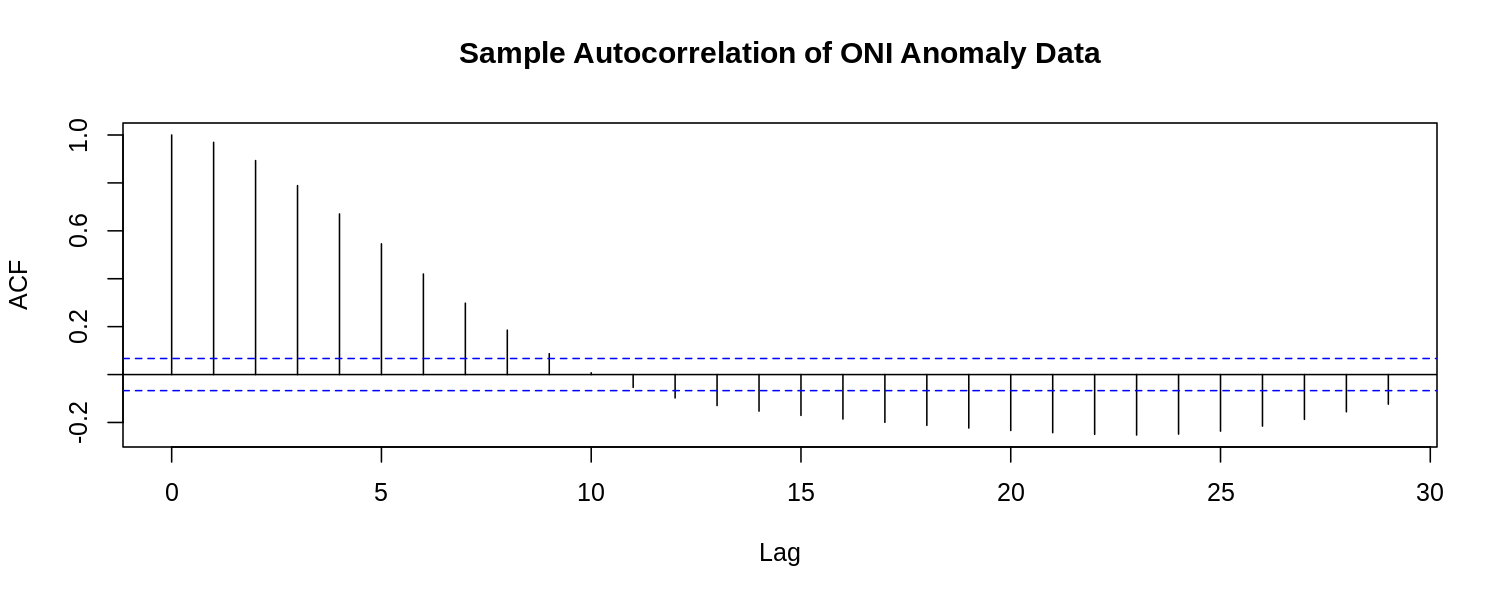

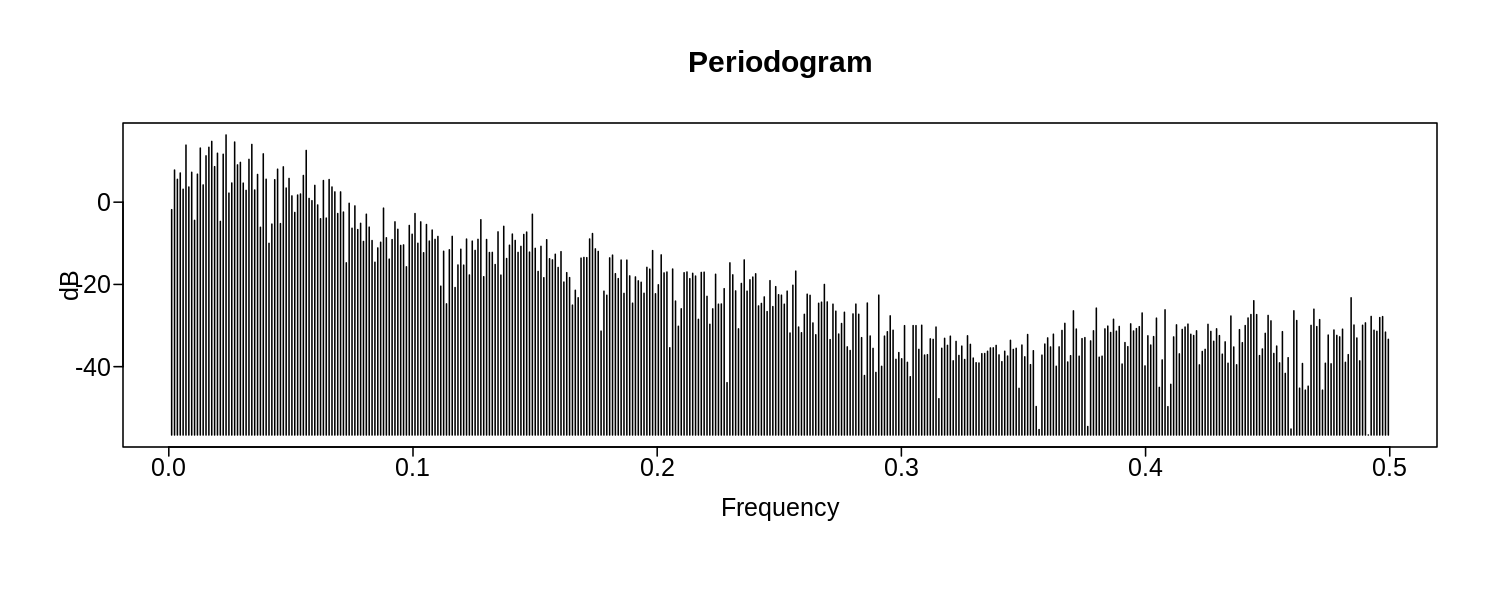

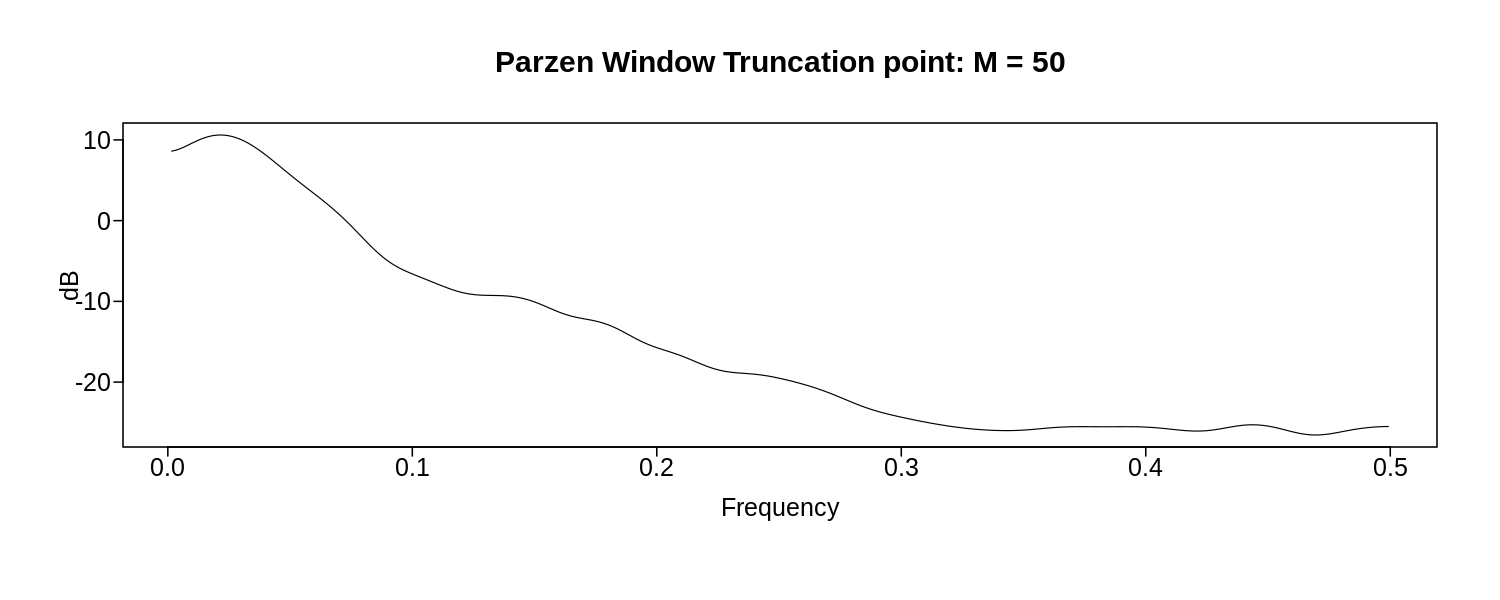

In [49]:
#Time Series of ONI Anomaly Data
oni.ts <- ts(oni.df$ANOM, start = c(1964, 1), end= c(2017,1), frequency = 12)
plot(oni.ts, main = "Three-month running average of ONI")

#Sample Autocorrelation of ONI Anomaly Data
acf(oni.df$ANOM, type= "correlation", main = "Sample Autocorrelation of ONI Anomaly Data")

#Periodogram of ONI Anomaly Data
periodogram <- period.wge(oni.df$ANOM, plot = TRUE)

#Function to create the parzen window
oni.data <- parzen.wge(oni.ts)

### *MEI*

Below are a time series realization, sample autocorrelation, and periodogram of the MEI data. I also employed the "parzen.wge" function to create a smoothed version of the periodogram called a parzen window. 

Similar to the ONI data, the periodogram and parzen window show a peak at frequency = 0.03. However, they also show another peak at frequency = 0.16. These frequencies correlates to a period of p = 1/0.03 = 33.33 and p = 1/0.16 = 6.25. Since the time unit of the ONI dataset is months, this means that our time realization has periods around 3 years and 6 months. The MEI time realization is slightly more jagged than the ONI time series, which represents its multiple frequency peaks. However, the MEI time realization also has peaks occurring an average of 3 times a decade, like the ONI time series. 

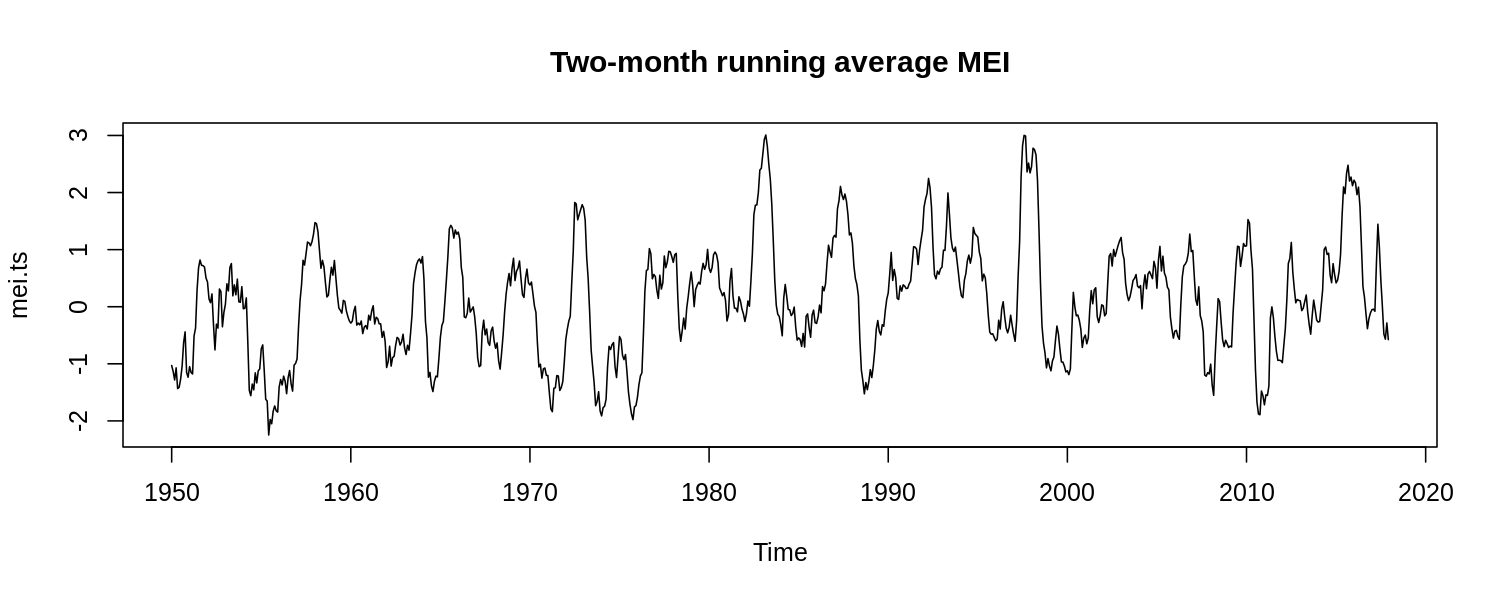

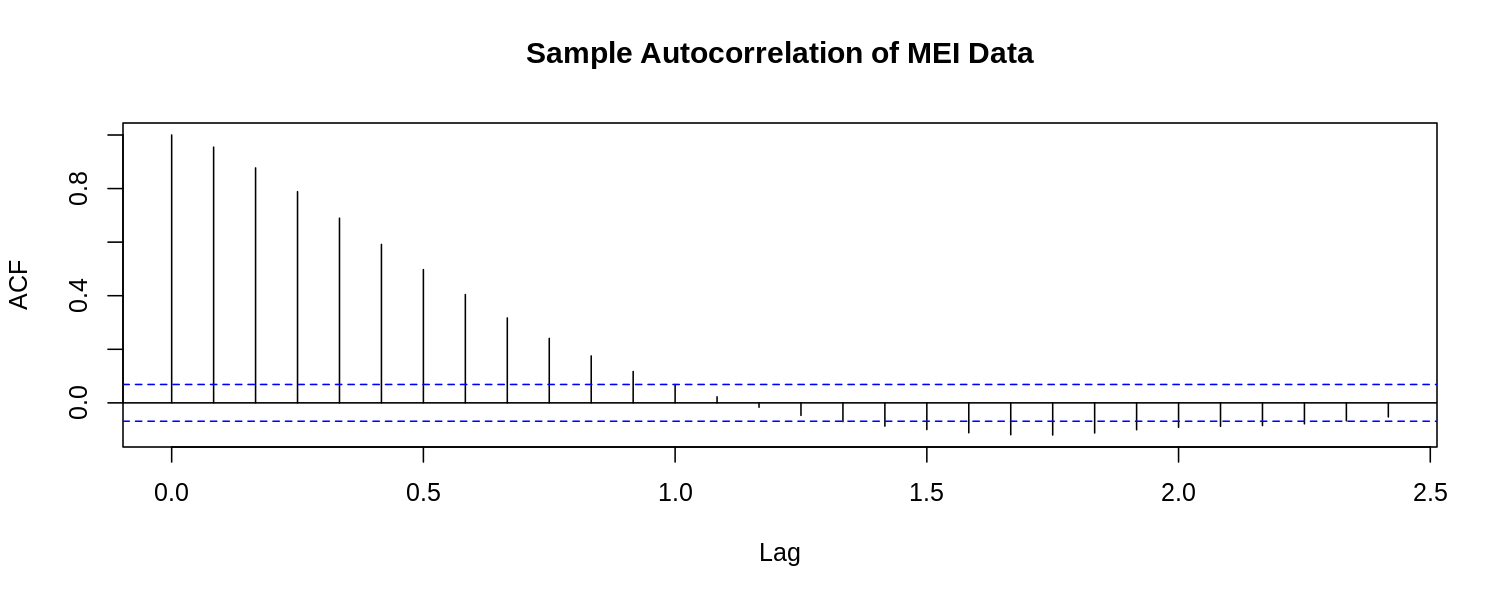

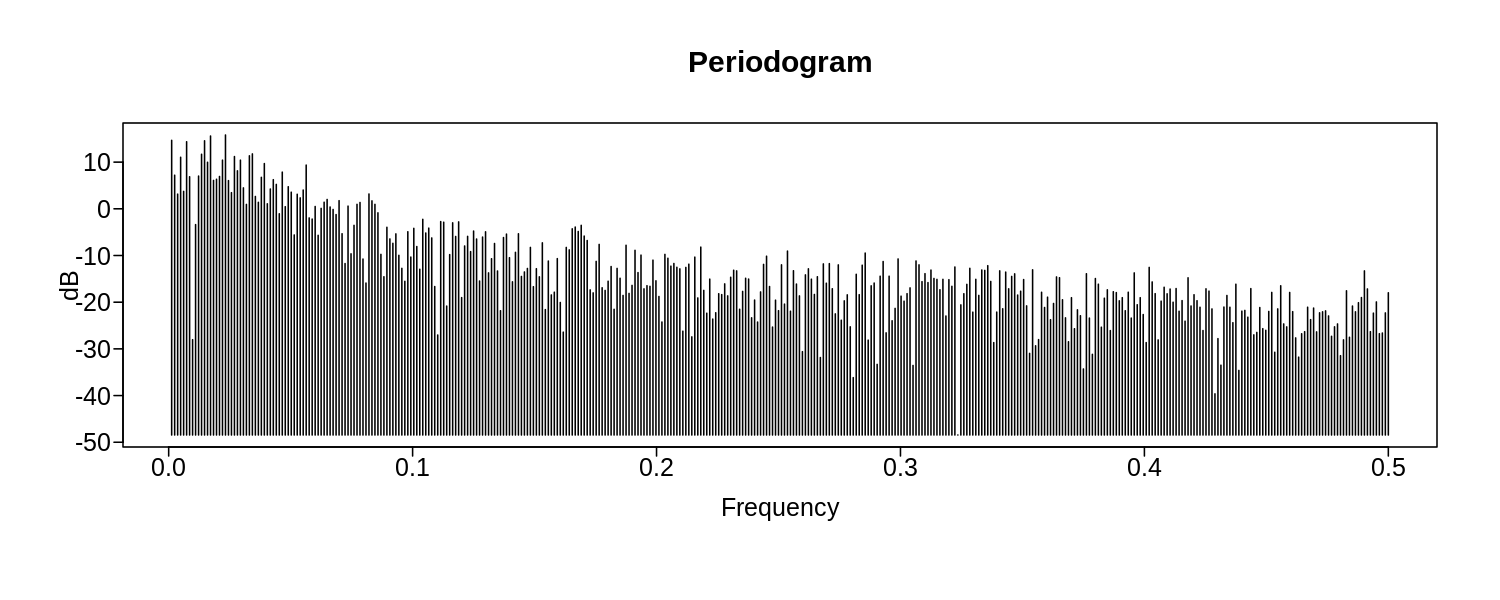

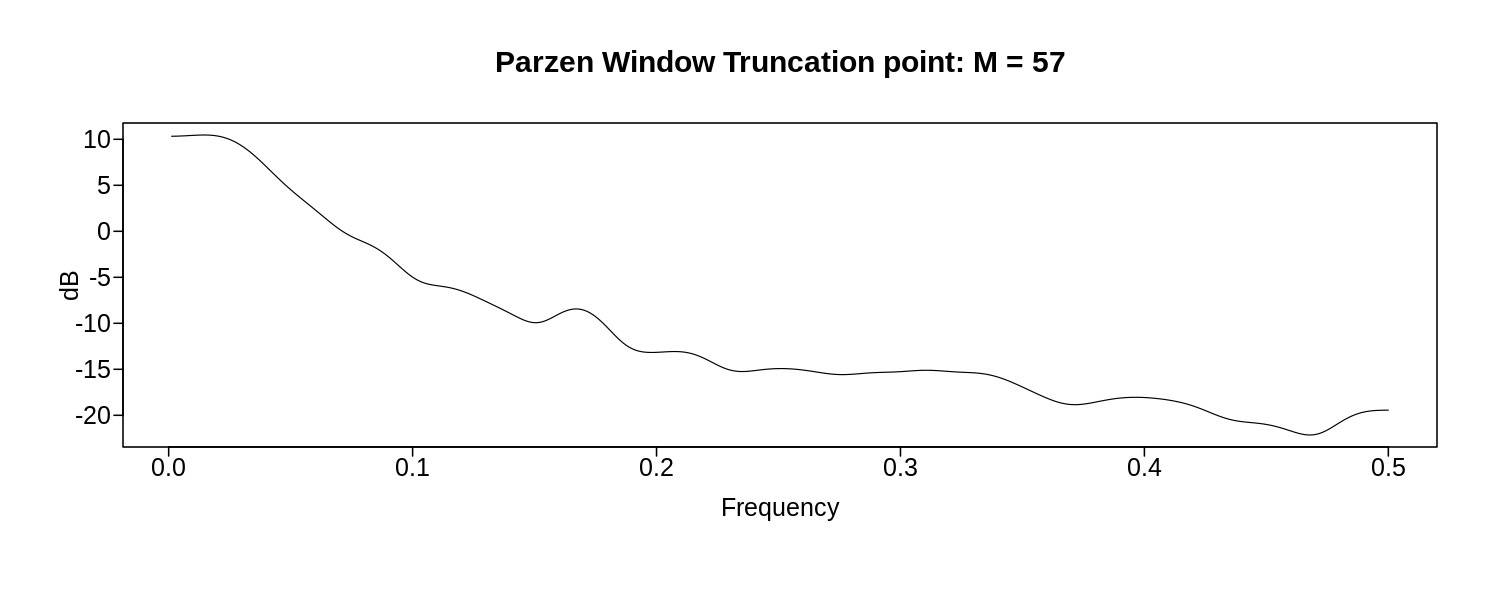

In [50]:
# Convert the last twelve columns into a row-by-row vector
mei.ts <- ts(as.vector(t(mei.df[,2:length(my.cols)])), start = c(1950, 1), frequency = 12)

#Time series of Two-month running average MEI
plot(mei.ts, main = "Two-month running average MEI")

#Sample Autocorrelation of MEI Data
acf(mei.ts, type= "correlation", main = "Sample Autocorrelation of MEI Data")

#Periodogram of MEI Data
periodogram <- period.wge(mei.ts, plot = TRUE)

#Parzen window to create smoothed periodogram
mei.data <- parzen.wge(mei.ts)

### *PAD*

Below are a time series realization, sample autocorrelation, and periodogram of the PAD data. I also employed the "parzen.wge" function to create a smoothed version of the periodogram called a parzen window. 

The following data has an irregular periodogram with no strong peaks. Furthermore, it has only one autocorrelation peak at lag 0 and no clear pattern in the realization.

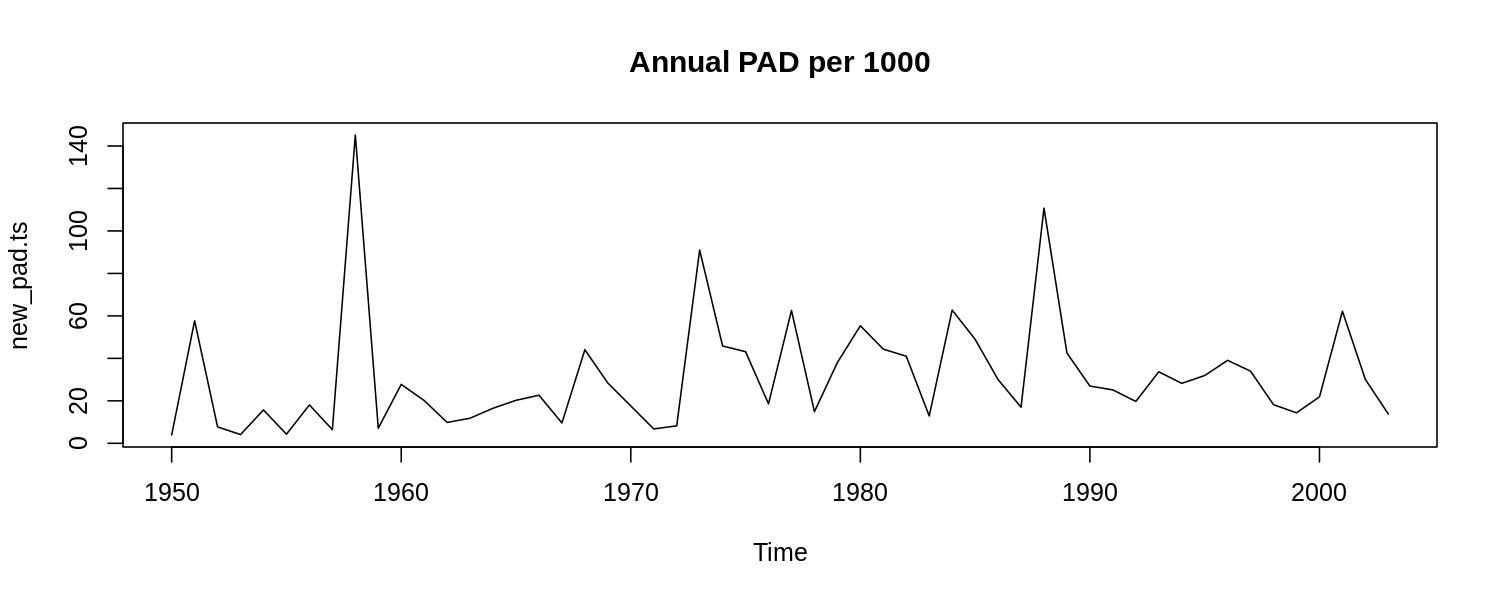

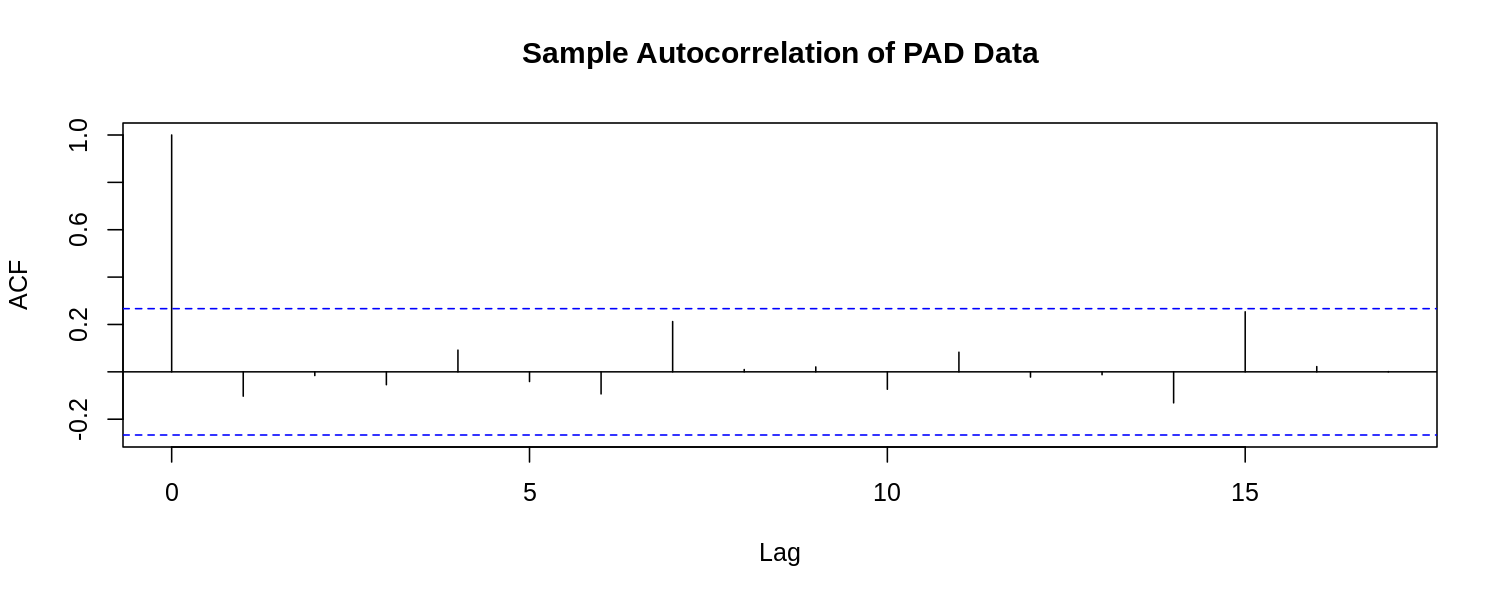

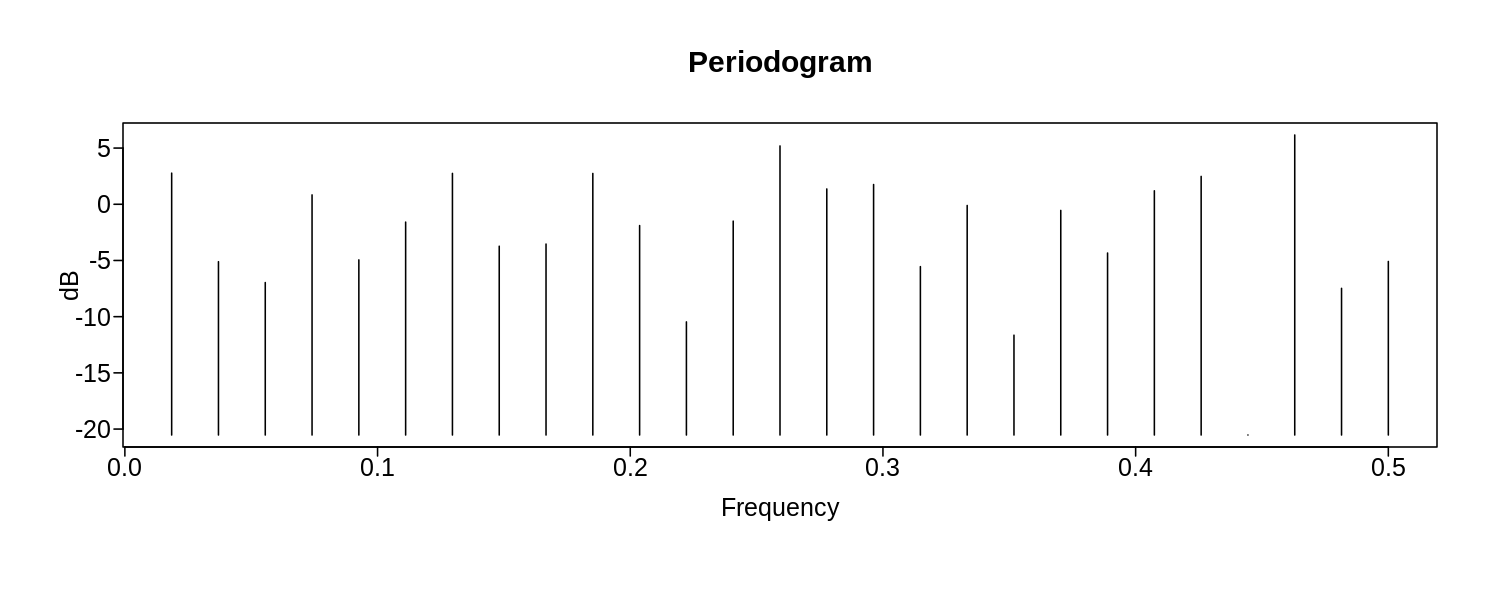

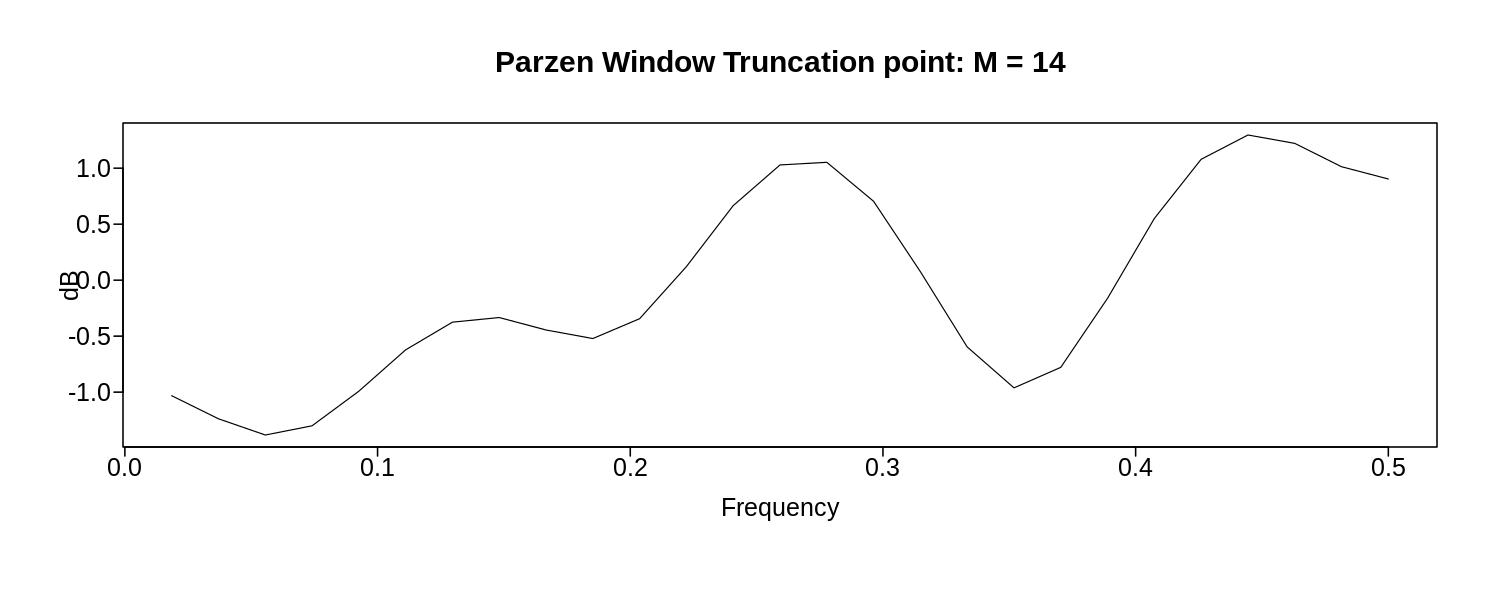

In [57]:
#Time series of PAD data
new_pad.ts <- ts(new_pad$pad_per_1000, start = c(1950, 1))
plot(new_pad.ts, main = "Annual PAD per 1000")

#Sample Autocorrelation of PAD Data
acf(new_pad.ts, type= "correlation", main = "Sample Autocorrelation of PAD Data")

#Periodogram of PAD Data
periodogram <- period.wge(new_pad.ts, plot = TRUE)

#Parzen window to create smoothed periodogram
pad.data <- parzen.wge(new_pad.ts)

### *AOI*

Below are a time series realization, sample autocorrelation, and periodogram of the AOI data. I also employed the "parzen.wge" function to create a smoothed version of the periodogram called a parzen window. 

The periodogram and parzen window show a peak at frequency = 0 and frequency = 0.16. A frequency of 0 means that the series is aperiodic, while a frequency of 0.16 correlates to a period of p = 1/0.16 = 6. Since the time unit of the AOI dataset is months, this means that our time realization has a short period of 6 months. 

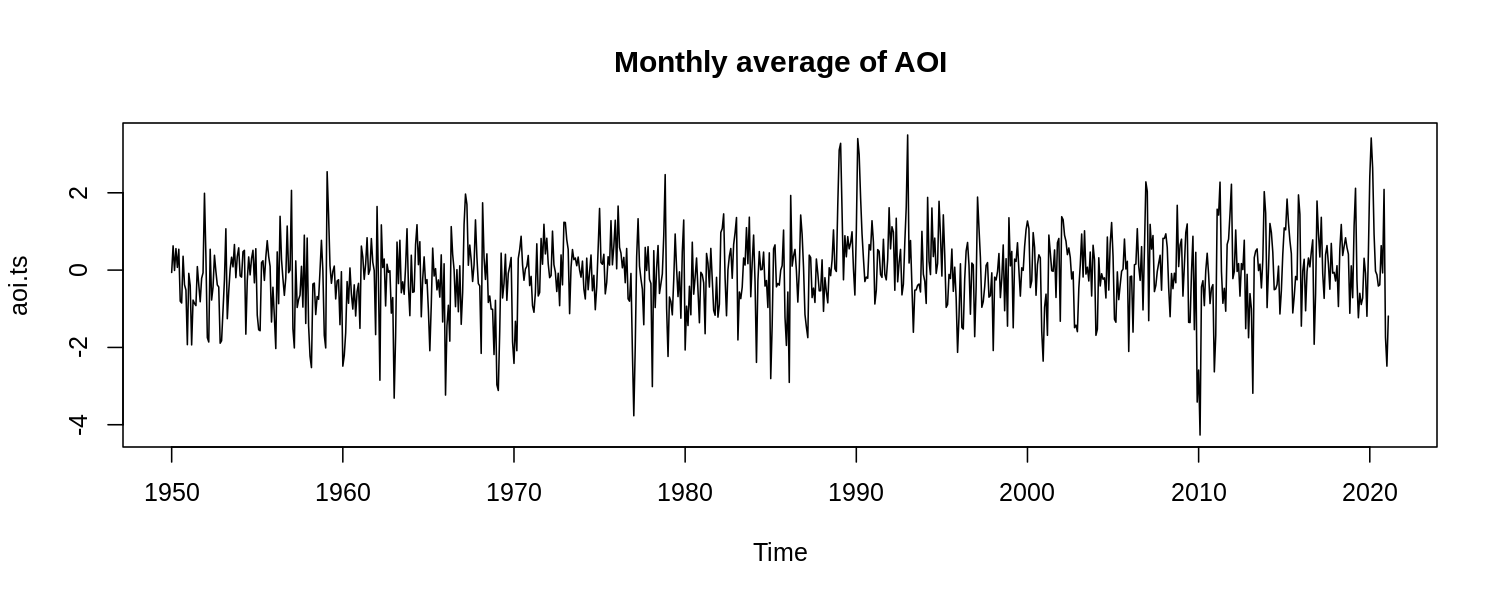

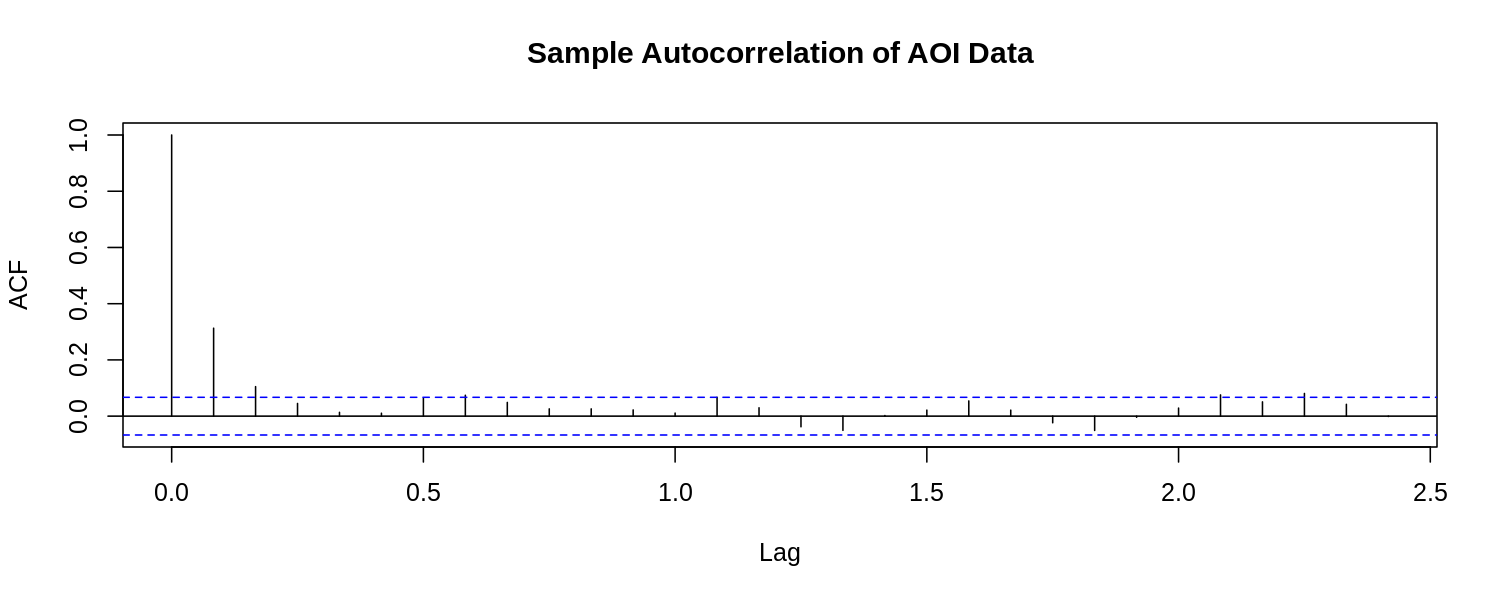

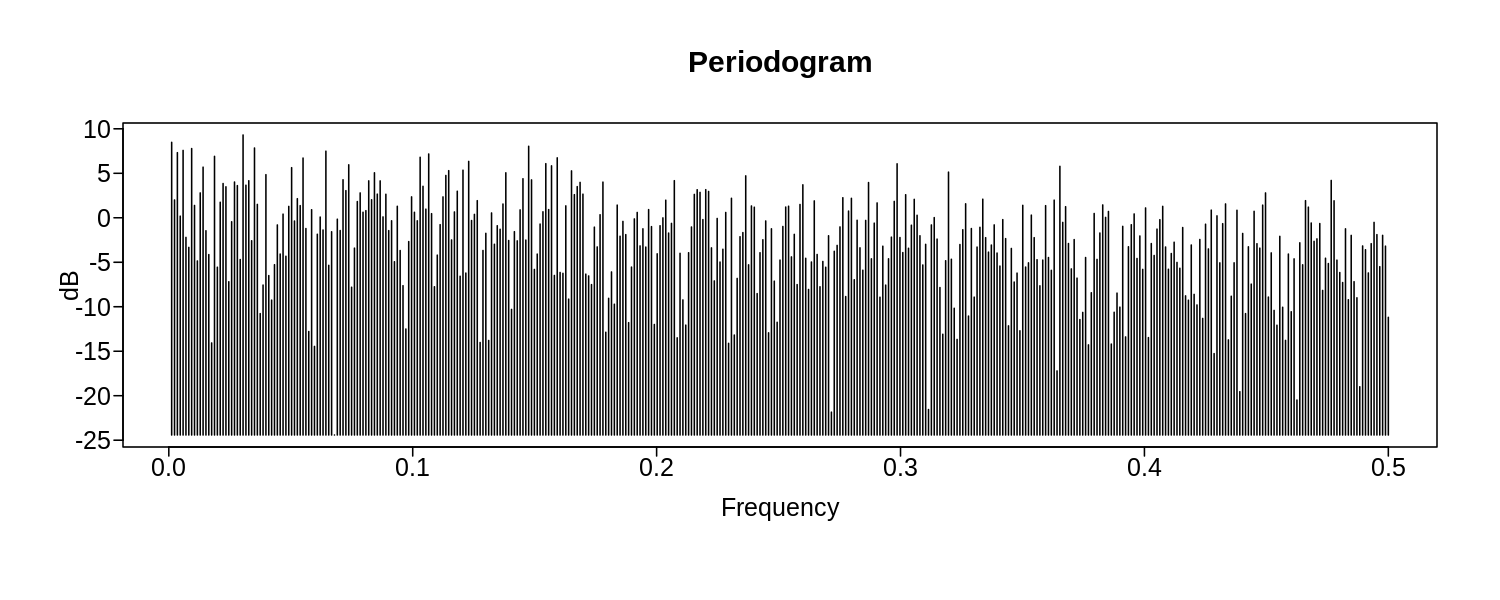

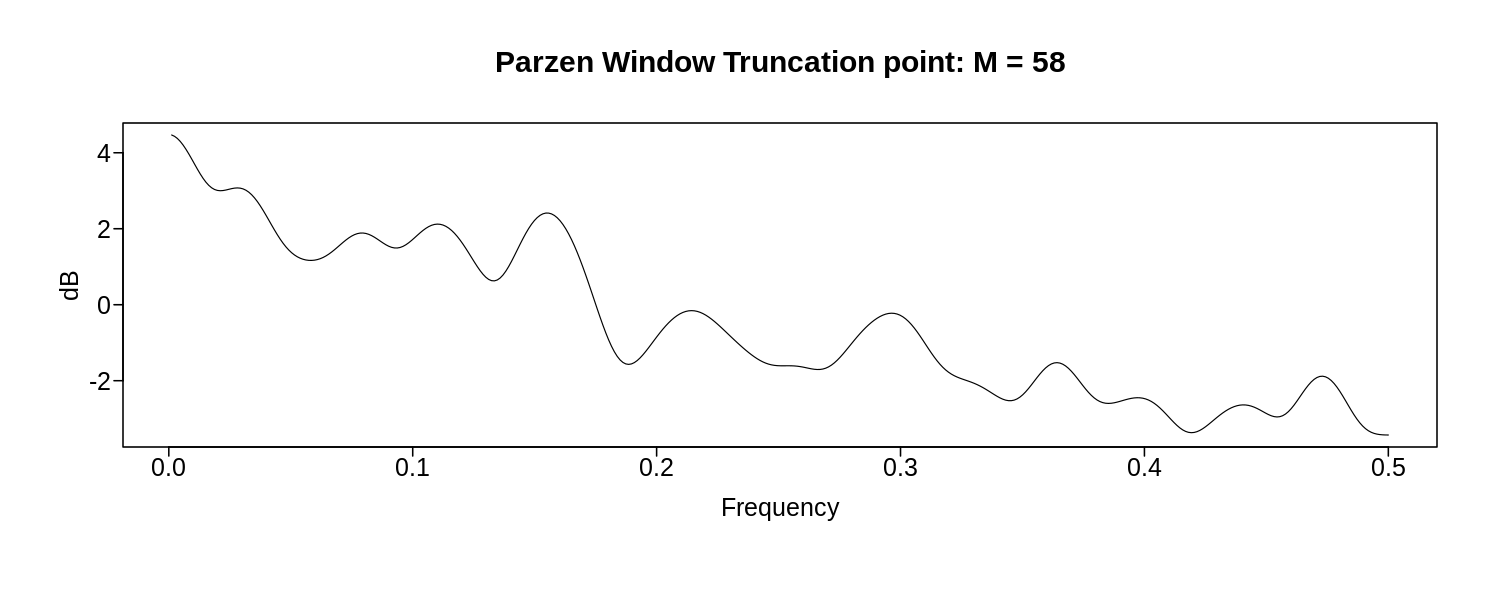

In [55]:
#Time series of Two-month running average MEI
aoi.ts <- ts(aoi.df$AO.Index, start= c(1950,1), frequency = 12)
plot(aoi.ts, main = "Monthly average of AOI")

#Sample Autocorrelation of ONI Anomaly Data
acf(aoi.ts, type= "correlation", main = "Sample Autocorrelation of AOI Data")

#Periodogram of ONI Anomaly Data
periodogram <- period.wge(aoi.ts, plot = TRUE)

aoi.data <- parzen.wge(aoi.ts)

## Discussion and Conclusions
First, I investigated the ENSO data. To do this, I recreated Figure 1 in the Lam et al. (2019) paper using ONI, MEI, and PAD data and then analyzed the sample autocovariance and periodogram of the ONI and MEI. I began by downloading the ONI data, reading it into a table, and then subsetting the dataset by the years that the paper investigated (1964-2017) and the months included in the Figure 1 plot (December, January, and February). Using this subsetted data, I was able to plot year by anomaly, successfully recreating the first plot in Figure 1. Similarly, after downloading, cleaning, and subsetting the MEI data by the years 1964-2017, I was able to recreate the Figure 1 plot by graphing year by the "DecJan" column. To recreate the PAD plot in Figure 1, I had to combine PAD data with country population data. Using this combined dataset, I was able to find the annual PAD rate per 1000 for East Asian, South Asian, and Southeastern Asian countries. By graphing year by total affected by 1000, I was able to recreate the final plot in Figure 1.

Next, I made the ONI, MEI, PAD, and AOI data into time series and investigated their time series realizations, sample autocorrelations, and periodograms. The ONI periodogram data revealed a period of about 3 years; however, the changing magnitude of the realization made it difficult to see a clear pattern. The MEI data showed similar patterns, with a period of 3 years, as well as a smaller frequency of about 6 months. Since the MEI and ONI are two strong indicators for El Niño, it is logical that they showed similar patterns. Together, these two indicators reveal that the dominant frequencies of El Niño are approximately 0.03 and 0.16. Lam et al. state that El Niño events are classified as ONI and MEI sea surface temperatures that are above or below $\pm$0.5$^\circ$C the average temperature for that time of year, for "at least 5 consecutive overlapping three-month periods". This information, as well as the ONI and MEI data suggest that strong El Niño years were in the early 1980's, late 1990's to early 2000's, and early 2010's. 

Unlike the ONI and MEI data, the PAD data did not show any periodic tendencies. The irregular nature of the periodogram and time series realization demonstrate that the PAD data is not stationary, and thus cannot be analyzed using the same methods as the data above. 

Finally, after investigating the El Niño data, I applied the same methods to the Arctic Oscillation Index (AOI) data to determine whether it has any El Niño-like patterns. The periodogram revealed that the AOI has mostly aperiodic behavior with a smaller period of about 6 months. This demonstrates the Arctic oscillations have a short-memory, only capturing information from about a year before or for about after. Overall, the Arctic oscillations data did not show similar patterns to El Niño oscillations.

Overall, the biggest challenge I faced was interpreting all of the data. In particular, I had difficulties understanding how to connect the frequency and period information from the realizations, sample autocorrelations, and periodograms to finding the El Niño years. I was able to overcome this challenge by asking for help from Professor Davis, doing more research on how to interpret these tools, and reading the Lam et al. (2019) paper to see how they interpreted El Niño years. 

## References
Lam HCY, Haines A, McGregor G, Chan EYY, Hajat S. Time-Series Study of Associations between Rates of People Affected by Disasters and the El Niño Southern Oscillation (ENSO) Cycle. International Journal of Environmental Research and Public Health. 2019; 16(17):3146. https://doi.org/10.3390/ijerph16173146

NOAA. (n.d.). Monitoring &amp; Data: Daily Arctic Oscillation Index. Retrieved March 06, 2021, from https://www.cpc.ncep.noaa.gov/products/precip/CWlink/daily_ao_index/ao_index.html